In [22]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
#import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [44]:
df = pd.read_csv('D:\\SiDi\\Project\\dataset\\tweet_sentiment_analysis.csv')
df.size

8578845

In [24]:
df = df[df['Sentimento'].notna()]
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00
...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00


In [25]:
indexes2Drop = df[df['date'].str.contains('bitcoin|Bitcoin|ETH|btc|BTC')].index
df.drop(indexes2Drop, inplace = True)
df['date'] = pd.to_datetime(df['date']).dt.date

<AxesSubplot:xlabel='date'>

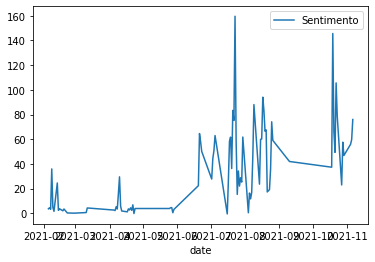

In [26]:
#pd.DatetimeIndex(df['date']).normalize()
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().sort_values()
#df.groupby(pd.DatetimeIndex(df['date']).normalize())['Sentimento'].sum().plot(legend=True)
df.groupby(df['date'])['Sentimento'].sum().plot(legend=True)


In [27]:
# twFrame[(twFrame["Sentimento"].sort_values() > 0.2) | (twFrame["Sentimento"].sort_values() < -0.2) ]
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum()
g = df.groupby(pd.DatetimeIndex(df['date']).normalize()).sum()
g.reset_index(inplace = True)
g['Sentimento Norm'] = (g['Sentimento'] - g['Sentimento'].min())/(g['Sentimento'].max() - g['Sentimento'].min())
g

,date,Unnamed: 0,Sentimento,Sentimento Norm
0,2021-02-05,35027685,3.65,0.03
1,2021-02-06,59631737,4.48,0.03
2,2021-02-07,45563625,3.29,0.02
3,2021-02-08,60417253,35.96,0.23
4,2021-02-09,24797175,4.87,0.03
...,...,...,...,...
85,2021-10-28,97233097740,57.62,0.36
86,2021-10-29,56264321546,46.84,0.30
87,2021-11-04,49380328001,55.90,0.35
88,2021-11-05,69761345728,59.75,0.38


In [28]:
minmaxpoints = g[ (g['Sentimento'] >= 0.75) | (g['Sentimento'] <= 0.2) ]
minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minmaxpoints

,date,Unnamed: 0,Sentimento,Sentimento Norm
0,2021-02-05,35027685,3.65,0.03
1,2021-02-06,59631737,4.48,0.03
2,2021-02-07,45563625,3.29,0.02
3,2021-02-08,60417253,35.96,0.23
4,2021-02-09,24797175,4.87,0.03
...,...,...,...,...
85,2021-10-28,97233097740,57.62,0.36
86,2021-10-29,56264321546,46.84,0.30
87,2021-11-04,49380328001,55.90,0.35
88,2021-11-05,69761345728,59.75,0.38


In [29]:
category = ['Negativo','Neutro','Positivo']
df['DSent'] = pd.cut(df['Sentimento'], bins=[-1,-0.5,0.5,1], labels=category)
df

,Unnamed: 0,date,text,cleantext,Sentimento,DSent
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,Neutro
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,Neutro
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,Neutro
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,Neutro
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,Neutro
...,...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00,Neutro
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00,Neutro
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00,Neutro
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00,Neutro


In [30]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(df[['Dis_Sentimento']])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
# df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
# df

df1 = pd.get_dummies(df,columns=['DSent'])
df1

,Unnamed: 0,date,text,cleantext,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00,0,1,0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00,0,1,0
2,2,2021-02-10,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00,0,1,0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00,0,1,0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00,0,1,0
...,...,...,...,...,...,...,...,...
1715764,1905880,2021-11-05,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00,0,1,0
1715765,1905881,2021-11-05,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00,0,1,0
1715766,1905882,2021-11-05,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00,0,1,0
1715767,1905883,2021-11-05,NGL wouldn’t mind another little quick dip dow...,"['ngl', 'mind', 'another', 'little', 'quick', ...",0.00,0,1,0


<AxesSubplot:xlabel='date'>

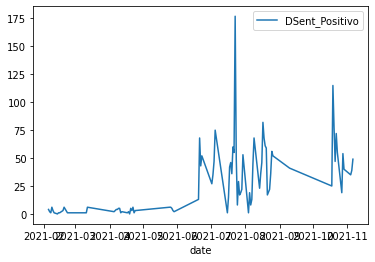

In [31]:
# df[('Positivo',)]
df1.groupby(df1['date'])['DSent_Positivo'].sum().plot(legend=True)

In [32]:
datapositivo = df1.groupby(pd.DatetimeIndex(df1['date'])).sum()
datapositivo.reset_index(inplace = True)
datapositivo

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,2021-02-05,35027685,3.65,0.00,"1,690.00",4.00
1,2021-02-06,59631737,4.48,0.00,"3,276.00",2.00
2,2021-02-07,45563625,3.29,0.00,"3,029.00",1.00
3,2021-02-08,60417253,35.96,1.00,"5,640.00",6.00
4,2021-02-09,24797175,4.87,0.00,"4,347.00",3.00
...,...,...,...,...,...,...
85,2021-10-28,97233097740,57.62,23.00,"55,748.00",54.00
86,2021-10-29,56264321546,46.84,7.00,"35,760.00",40.00
87,2021-11-04,49380328001,55.90,8.00,"26,278.00",35.00
88,2021-11-05,69761345728,59.75,8.00,"37,705.00",39.00


In [33]:
maxpoints = datapositivo[ (datapositivo['DSent_Positivo'] >= 50) ]
maxpoints['date'] = pd.to_datetime(maxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
maxpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
37,2021-06-21,9367743210,64.62,36.00,"41,625.00",68.00
39,2021-06-23,4201282627,50.15,15.00,"29,291.00",52.00
43,2021-07-05,6942460953,63.01,6.00,"25,900.00",75.00
49,2021-07-21,17885663632,83.39,15.00,"38,836.00",60.00
50,2021-07-22,13149779328,75.26,6.00,"30,772.00",55.00
51,2021-07-23,18452617339,159.63,13.00,"43,345.00",177.00
58,2021-07-30,23558927671,61.80,11.00,"38,328.00",53.00
64,2021-08-09,40382954234,88.08,19.00,"53,414.00",68.00
68,2021-08-17,34902587528,94.07,8.00,"35,228.00",82.00
69,2021-08-18,36865008796,83.27,13.00,"38,146.00",68.00


AttributeError: 'list' object has no attribute 'tail'

In [34]:
maxpoints['date'] = maxpoints['date'].astype(str)
maxpointsList = list(maxpoints['date'])#ERROR: Command errored out with exit status 1:
maxpointsList

['2021-06-21',
 '2021-06-23',
 '2021-07-05',
 '2021-07-21',
 '2021-07-22',
 '2021-07-23',
 '2021-07-30',
 '2021-08-09',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-25',
 '2021-08-26',
 '2021-10-19',
 '2021-10-20',
 '2021-10-22',
 '2021-10-23',
 '2021-10-28']

In [35]:
btcPrice = pd.read_csv('D:\\SiDi\\Project\\dataset\\BTC-USD.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']


In [36]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @maxpointsList')
btcPrice.loc[zz.index,'Positivo'] = True
btcPrice['Positivo'] = btcPrice['Positivo'].replace(np.nan,False)
btcPrice['Date']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2607    2021-11-06
2608    2021-11-07
2609    2021-11-08
2610    2021-11-09
2611    2021-11-10
Name: Date, Length: 2612, dtype: object

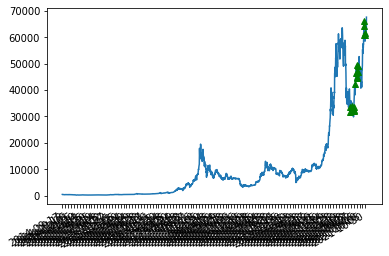

In [37]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Positivo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts) 
plt.xticks(x[::25])
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
plt.savefig('Positivo.png')

<AxesSubplot:xlabel='date'>

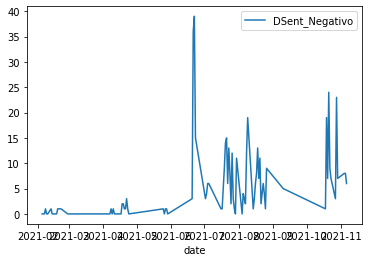

In [38]:
df1.groupby(df1['date'])['DSent_Negativo'].sum().plot(legend=True)

In [39]:
minpoints = datapositivo[ (datapositivo['DSent_Negativo'] >= 15) ]
minpoints['date'] = pd.to_datetime(minpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
37,2021-06-21,9367743210,64.62,36.00,"41,625.00",68.00
38,2021-06-22,8283517330,57.98,39.00,"45,758.00",43.00
39,2021-06-23,4201282627,50.15,15.00,"29,291.00",52.00
49,2021-07-21,17885663632,83.39,15.00,"38,836.00",60.00
64,2021-08-09,40382954234,88.08,19.00,"53,414.00",68.00
79,2021-10-19,80898734810,145.66,19.00,"63,456.00",115.00
81,2021-10-21,60228395814,49.40,24.00,"42,335.00",47.00
85,2021-10-28,97233097740,57.62,23.00,"55,748.00",54.00


In [40]:
minpoints['date'] = minpoints['date'].astype(str)
minpointsList = list(minpoints['date'])
minpointsList

['2021-06-21',
 '2021-06-22',
 '2021-06-23',
 '2021-07-21',
 '2021-08-09',
 '2021-10-19',
 '2021-10-21',
 '2021-10-28']

In [41]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
bticMin = btcPrice.query('Date in @minpointsList')
btcPrice.loc[bticMin.index,'Negativo'] = True
btcPrice['Negativo'] = btcPrice['Negativo'].replace(np.nan,False)
btcPrice['Date']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2607    2021-11-06
2608    2021-11-07
2609    2021-11-08
2610    2021-11-09
2611    2021-11-10
Name: Date, Length: 2612, dtype: object

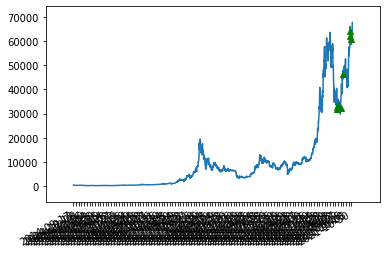

In [42]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Negativo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(x, ts)
plt.xticks(x[::25])
# plt.yticks(ts[::70])
plt.margins(0.1)
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
# plt.savefig('teste.png')